In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import sys
sys.path.append("..")
from plot_config import *

In [3]:
training = pd.read_csv("multi_3v3_blackbox_iter1000_run0.csv", index_col='Episodes')
seller_q = pd.read_csv("S1_run0.csv", index_col='Last offer')
buyer_q = pd.read_csv("B1_run0.csv", index_col='Last offer')
buyer_q = buyer_q[buyer_q.columns[::-1]] # reorder columns
seller_q = seller_q.iloc[::-1]

## Plot train results

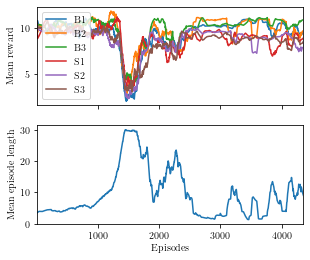

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1)
#ax = plt.subplot(211)
training[['B1', 'B2', 'B3', 'S1', 'S2', 'S3']].plot(ax=ax1)
training['episode_len'].plot(ax=ax2)

ax1.set(ylabel="Mean reward")
ax2.set(ylabel="Mean episode length")

for ax in fig.get_axes():
    ax.label_outer()
    
fig.set_size_inches(w=4.7747, h=4.)
plt.savefig('multi_3v3_blackbox_train.pgf')

## Plot Q Tables

In [5]:
a = buyer_q.index.min()
b = buyer_q.index.max()

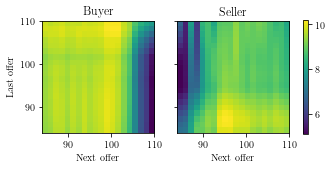

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
im1 = ax1.imshow(buyer_q, extent=[a,b, a, b])
im2 = ax2.imshow(seller_q, extent=[a,b, a, b])
ax1.set(title='Buyer')
ax2.set(title='Seller')
ax1.set(ylabel="Last offer")
ax1.set(xlabel="Next offer")
ax2.set(xlabel="Next offer")

for ax in fig.get_axes():
    ax.label_outer()
fig.colorbar(im1, ax=[ax1,ax2], fraction=0.0215)
fig.set_size_inches(w=4.7747, h=4.)
    
plt.savefig('multi_3v3_blackbox_qtables.pgf')